In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# Generate some synthetic data for the example
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Fit polynomial regression models with different degrees
degrees = [1, 3, 5, 9]  # Polynomial degrees to try

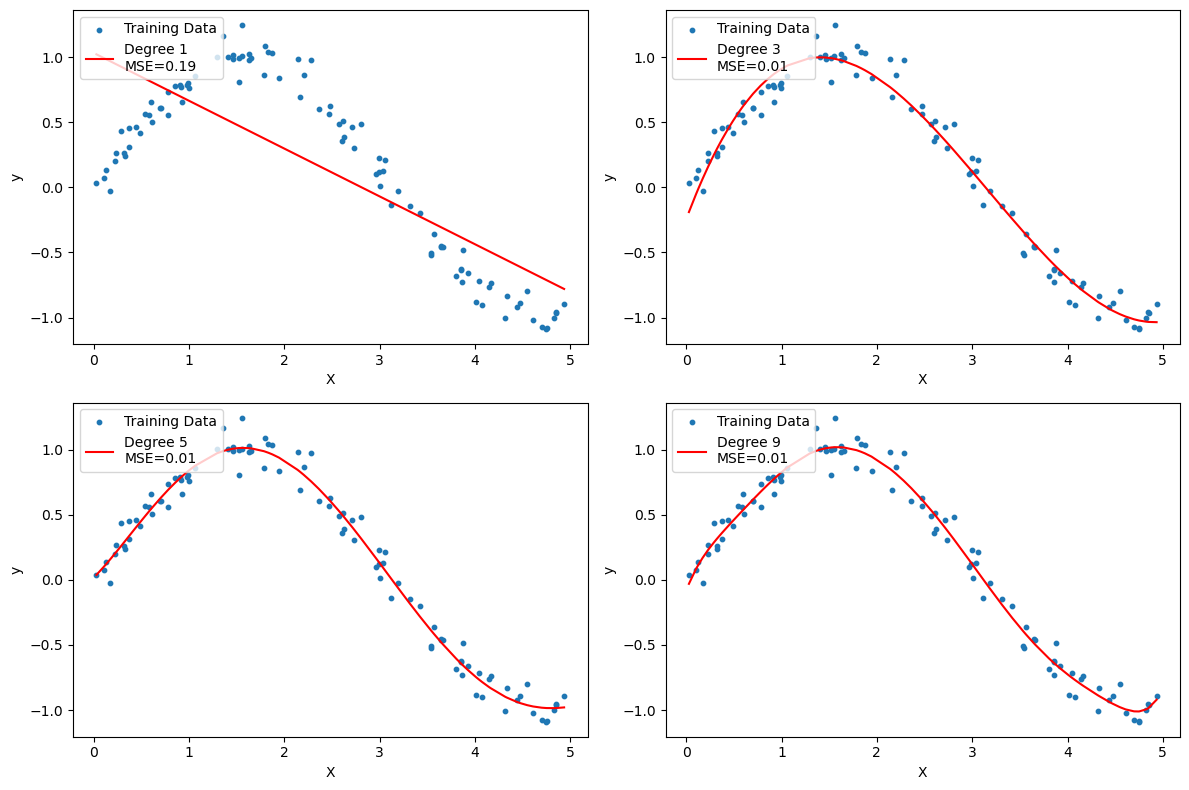

In [3]:
plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees):
    # Transform the features into polynomial terms
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = polynomial_features.fit_transform(X)

    # Fit a linear regression model to the transformed features
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on the original data points for plotting
    y_pred = model.predict(X_poly)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y, y_pred)

    # Plot the results
    plt.subplot(2, 2, i + 1)
    plt.scatter(X, y, s=10, label="Training Data")
    plt.plot(X, y_pred, color='r', label="Degree %d\nMSE=%.2f" % (degree, mse))
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend(loc="upper left")

plt.tight_layout()
plt.show()
